In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [2]:
data_1 = pd.read_csv('input/zhenjiang_power.csv')

In [3]:
data_1.head()

,user_id,record_date,power_consumption
0,1,2015-01-01,1135.0
1,1,2015-01-02,570.0
2,1,2015-01-03,3418.0
3,1,2015-01-04,3968.0
4,1,2015-01-05,3986.0


In [4]:
data_2 = pd.read_csv('input/zhenjiang_power_9.csv')

In [5]:
data_2.head()

,record_date,user_id,power_consumption
0,2016/9/2,20,1
1,2016/9/3,20,1
2,2016/9/4,20,1
3,2016/9/1,49,1
4,2016/9/2,49,1


In [6]:
train_df = pd.concat([data_1,data_2])

In [7]:
train_df.loc[:,'record_date'] = pd.to_datetime(train_df['record_date'])

In [8]:
train_df = train_df[['record_date', 'power_consumption']].groupby('record_date').agg('sum')

In [9]:
train_df = train_df.reset_index()
train_df.head()

,record_date,power_consumption
0,2015-01-01,2900575.0
1,2015-01-02,3158211.0
2,2015-01-03,3596487.0
3,2015-01-04,3939672.0
4,2015-01-05,4101790.0


#### Feature Engineer

In [10]:
total_df=train_df

In [11]:
total_df.loc[:,'dow'] = total_df['record_date'].apply(lambda x:x.dayofweek)
total_df.loc[:,'dom'] = total_df['record_date'].apply(lambda x:x.day)
total_df.loc[:,'month'] = total_df['record_date'].apply(lambda x:x.month)
total_df.loc[:,'year'] = total_df['record_date'].apply(lambda x:x.year)

In [12]:
total_df.tail()

,record_date,power_consumption,dow,dom,month,year
634,2016-09-26,4042132.0,0,26,9,2016
635,2016-09-27,4287965.0,1,27,9,2016
636,2016-09-28,4086998.0,2,28,9,2016
637,2016-09-29,3941842.0,3,29,9,2016
638,2016-09-30,3783264.0,4,30,9,2016


In [13]:
total_df.loc[:,'weekend'] = 0
total_df.loc[:,'weekend_sat'] = 0
total_df.loc[:,'weekend_sun'] = 0

In [14]:
total_df.loc[(total_df['dow']>4),'weekend'] = 1
total_df.loc[(total_df['dow']==5),'weekend_sat'] = 1
total_df.loc[(total_df['dow']==6),'weekend_sun'] =1

In [15]:
total_df.head()

,record_date,power_consumption,dow,dom,month,year,weekend,weekend_sat,weekend_sun
0,2015-01-01,2900575.0,3,1,1,2015,0,0,0
1,2015-01-02,3158211.0,4,2,1,2015,0,0,0
2,2015-01-03,3596487.0,5,3,1,2015,1,1,0
3,2015-01-04,3939672.0,6,4,1,2015,1,0,1
4,2015-01-05,4101790.0,0,5,1,2015,0,0,0


In [16]:
def week_of_month(day):
    if day in range(1,8):
        return 1
    if day in range(8,15):
        return 2
    if day in range(15,22):
        return 3
    else:
        return 4
total_df.loc[:,'week_of_month'] = total_df['dom'].apply(lambda x:week_of_month(x))

In [17]:
def period_of_month(day):
    if day in range(1,11):
        return 1
    if day in range(11,21):
        return 2
    else:
        return 3
total_df.loc[:,'period_of_month'] = total_df['dom'].apply(lambda x:period_of_month(x))

In [18]:
def period2_of_month(day):
    if day in range(1,16):
        return 1
    else:
        return 2
total_df.loc[:,'period2_of_month'] = total_df['dom'].apply(lambda x:period2_of_month(x))

In [19]:
total_df['Holiday']=0

In [20]:
### 国庆法定假期
total_df.loc[(total_df.month==10)&(total_df.dom<8), 'Holiday']=1

In [21]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# create the object of calendar
cal = calendar()
# create the date list of holidys
holidays = cal.holidays(start=total_df['record_date'].min(), end=total_df['record_date'].max())

In [22]:
total_df['Holiday'] = np.where(total_df['record_date'].isin(holidays),1,total_df['Holiday'] )

In [23]:
total_df.columns

Index(['record_date', 'power_consumption', 'dow', 'dom', 'month', 'year',
       'weekend', 'weekend_sat', 'weekend_sun', 'week_of_month',
       'period_of_month', 'period2_of_month', 'Holiday'],
      dtype='object')

In [24]:
var_to_encoding = [ u'dow', u'dom', u'month', u'year',
       u'weekend', u'weekend_sat', u'weekend_sun', u'week_of_month',
       u'period_of_month', u'period2_of_month', u'Holiday']
len(var_to_encoding)

11

In [25]:
dummy_df = pd.get_dummies(total_df,columns = var_to_encoding)
### get_dummies(DateFrame, columns)

### 特征工程 完成

In [26]:
dummy_df.head()

,record_date,power_consumption,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dom_1,...,week_of_month_2,week_of_month_3,week_of_month_4,period_of_month_1,period_of_month_2,period_of_month_3,period2_of_month_1,period2_of_month_2,Holiday_0,Holiday_1
0,2015-01-01,2900575.0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,2015-01-02,3158211.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,2015-01-03,3596487.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
3,2015-01-04,3939672.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,2015-01-05,4101790.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [27]:
len(dummy_df) ### 用

639

In [28]:
data = dummy_df.drop('record_date',axis = 1)

In [29]:
data_Y = data['power_consumption'].values

In [30]:
### 数据预测处理 和标准化
# 数据预处理
data = data.values.astype('float32')
max_value = np.max(data)
min_value = np.min(data)
scalar = max_value - min_value
data = list(map(lambda x: x / scalar, data))

In [31]:
data_Y  = data_Y.astype('float32')
max_value = np.max(data_Y)
min_value = np.min(data_Y)
scalar = max_value - min_value
data_Y = list(map(lambda x: x / scalar, data_Y))

In [32]:
def create_dataset(dataset_X,dataset_Y,look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset_X) - look_back):
        a = dataset_X[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset_Y[i + look_back])
    return np.array(dataX), np.array(dataY)

In [33]:
### 用过去一个月 预测 下一天
data_X,data_Y = create_dataset(dataset_X=data,dataset_Y = data_Y,look_back=30)

In [34]:
data_X.shape #### 609 data_size, 每一个data sequence 为 30， 70 个 特征

(609, 30, 70)

In [35]:
data_Y.shape

(609,)

In [36]:
# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size

In [37]:
train_size

426

In [38]:
test_size

183

In [39]:
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [40]:
test_X = test_X

In [41]:
train_X.shape ### 426 个 samples, 30 个序列， 70 个特征

(426, 30, 70)

In [42]:
train_X = train_X.reshape(-1,30,1,70)

In [43]:
train_Y= train_Y.reshape(-1,1,1)

In [44]:
# train_X = train_X.reshape(30,1,70)
# train_Y = train_Y.reshape(-1,1)

In [45]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
# from utils.layers import lstm

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
input_ph = tf.placeholder(shape=[30,1,70], dtype=tf.float32, name='input') ### 30 个序列，batch_size,70 个特征值
target_ph = tf.placeholder(shape=[1,1], dtype=tf.float32, name='target') ## 映射到一个数据数值上

In [47]:
### 输出的维度， 隐藏层， batch_size, keep_prob 
def lstm_cells(num_units, num_layers, batch_size,keep_prob = 1):
    ### 首先创建一个 cells的函数
    def build_cell(num_units,keep_prob):
        cell = tf.nn.rnn_cell.LSTMCell(num_units)
        ### cell, 进行 dropout
        cell  = tf.nn.rnn_cell.DropoutWrapper(cell,output_keep_prob=keep_prob)
        return cell
    ###  一个cell  组合多个 cell 组成 一个 多层的 cell
    cell  = tf.nn.rnn_cell.MultiRNNCell([build_cell(num_units,keep_prob) for _ in range(num_layers)])
    init_state = cell.zero_state(batch_size,tf.float32)
    return cell, init_state

In [48]:
def lstm(x, num_units, num_layers,batch_size, init_state=None, keep_prob=1, time_major=True, scope='lstm', reuse=None):
    with tf.variable_scope(scope, reuse=reuse):
        cell, zero_state =lstm_cells(num_units, num_layers, batch_size, keep_prob)
    if init_state is not None:
        out, final_state = tf.nn.dynamic_rnn(cell, x, initial_state=init_state, time_major=time_major)
    else:
        out, final_state = tf.nn.dynamic_rnn(cell, x, initial_state=zero_state, time_major=time_major)
    return out, final_state

In [49]:
def lstm_reg(inputs, num_units, output_size=1, keep_prob=1, num_layers=2, scope='lstm_reg', reuse=None,batch_size = 1):
    with tf.variable_scope(scope, reuse=reuse):
        ## input shape : (sequence,batch,features)
        net, state = lstm(inputs, num_units, num_layers,batch_size=batch_size, keep_prob=keep_prob)
        # net (sequence,batch_size, num_units)
        
        ### 只取最后的sequence
        net = net[-1] ## (batch,feature)
#         s, b, n = net.get_shape().as_list() # net (sequence,batch_size, num_units)
        #net = tf.reshape(net, (-1, num_units)) # (sequence,num_units)
        
        net = slim.fully_connected(net, output_size, activation_fn=None, scope='regression')
        ### (batch_size,1)
        return net

In [50]:
out = lstm_reg(input_ph,num_units=5,batch_size=1,reuse=tf.AUTO_REUSE)

In [51]:
out.shape

TensorShape([Dimension(1), Dimension(1)])

In [52]:
loss = tf.losses.mean_squared_error(target_ph, out)

In [53]:
opt = tf.train.AdamOptimizer(1e-2)

In [54]:
# gradients = opt.compute_gradients(loss)
# capped_gradients = [(tf.clip_by_value(grad, -1.0, 1.0), var) for grad, var in gradients if grad is not None]
# train_op = opt.apply_gradients(capped_gradients)

In [55]:
train_op = opt.minimize(loss)

In [56]:
sess = tf.Session()

In [57]:
sess.run(tf.global_variables_initializer())

In [58]:
sess.run(loss,feed_dict={input_ph:train_X[0],target_ph:train_Y[0]})

0.9073811

In [59]:
test_X = test_X.reshape(-1,30,1,70)
test_Y= test_Y.reshape(-1,1,1)

In [60]:
test_Y = test_Y.flatten()

In [61]:
for epoch in range(160):
    losses = []
    for (seq_X,seq_Y) in zip(train_X,train_Y):
        feed_dict={input_ph:seq_X,target_ph:seq_Y}
        # training
        sess.run(train_op,feed_dict=feed_dict)
        loss_value = sess.run(loss, feed_dict=feed_dict)
        losses.append(loss_value)
#         print(losses)
    if (epoch + 1) % 20 == 0:
        
        ### test_loss
        test_pred =[]
        for test_data in test_X:
             test_pred.append(sess.run(out,feed_dict={input_ph:test_data})[0][0])
        mean_squar_error = np.mean((test_Y-np.array(test_pred))**2)
        print('Epoch: {}, Train_Loss: {:.5f}, Test_Loss: {:.5f}'.format(epoch + 1,np.mean(losses),mean_squar_error))
    if mean_squar_error<0.0075:
        break

Epoch: 20, Train_Loss: 0.01776, Test_Loss: 0.01038
Epoch: 40, Train_Loss: 0.00883, Test_Loss: 0.01384
Epoch: 60, Train_Loss: 0.00823, Test_Loss: 0.01935
Epoch: 80, Train_Loss: 0.00822, Test_Loss: 0.00574
Epoch: 100, Train_Loss: 0.00755, Test_Loss: 0.00542
Epoch: 120, Train_Loss: 0.00696, Test_Loss: 0.00868
Epoch: 140, Train_Loss: 0.00664, Test_Loss: 0.05592
Epoch: 160, Train_Loss: 0.00847, Test_Loss: 0.00815


In [62]:
train_records = '''
Epoch: 20, Train_Loss: 0.02148, Test_Loss: 0.01080
Epoch: 40, Train_Loss: 0.00899, Test_Loss: 0.01149
Epoch: 60, Train_Loss: 0.00891, Test_Loss: 0.01015
Epoch: 80, Train_Loss: 0.00752, Test_Loss: 0.00943
Epoch: 100, Train_Loss: 0.00810, Test_Loss: 0.00819
Epoch: 120, Train_Loss: 0.00701, Test_Loss: 0.00772
Epoch: 140, Train_Loss: 0.00586, Test_Loss: 0.00757
Epoch: 160, Train_Loss: 0.00677, Test_Loss: 0.00805
Epoch: 180, Train_Loss: 0.00570, Test_Loss: 0.01332
Epoch: 200, Train_Loss: 0.00637, Test_Loss: 0.01353
Epoch: 220, Train_Loss: 0.00565, Test_Loss: 0.00783
Epoch: 240, Train_Loss: 0.00581, Test_Loss: 0.01304
Epoch: 260, Train_Loss: 0.00567, Test_Loss: 0.01179
Epoch: 280, Train_Loss: 0.00512, Test_Loss: 0.01154
Epoch: 300, Train_Loss: 0.00516, Test_Loss: 0.01404
Epoch: 320, Train_Loss: 0.00515, Test_Loss: 0.01469
Epoch: 340, Train_Loss: 0.00657, Test_Loss: 0.03811
Epoch: 360, Train_Loss: 0.00536, Test_Loss: 0.00978
Epoch: 380, Train_Loss: 0.00509, Test_Loss: 0.01209
Epoch: 400, Train_Loss: 0.00535, Test_Loss: 0.01022
Epoch: 420, Train_Loss: 0.00492, Test_Loss: 0.01180
Epoch: 440, Train_Loss: 0.00614, Test_Loss: 0.01589
Epoch: 460, Train_Loss: 0.00518, Test_Loss: 0.01772
Epoch: 480, Train_Loss: 0.00575, Test_Loss: 0.01734
Epoch: 500, Train_Loss: 0.00506, Test_Loss: 0.01451'''

In [63]:
train_records = train_records.split(sep='\n')
train_records = train_records[1:]
test_losses = [record[-7:] for record in train_records]
test_losses = np.array(test_losses).astype('float')

In [64]:
train_losses = [record.split(',')[1][-7:] for record in train_records]
train_losses = np.array(train_losses).astype('float')

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

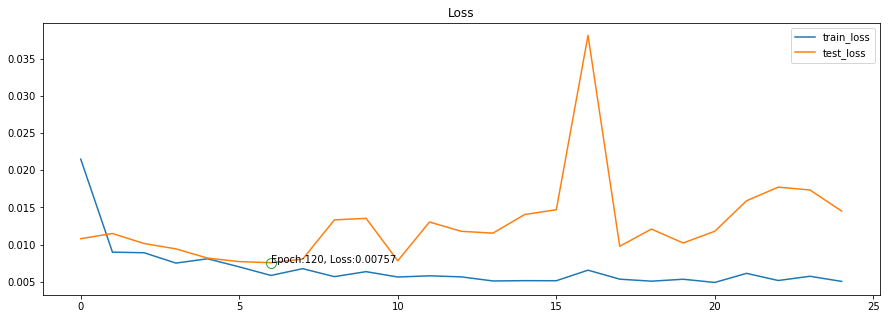

In [66]:
_=plt.figure(figsize=(15,5))
_=plt.title('Loss')
_=plt.plot(train_losses ,label = 'train_loss')
_=plt.plot(test_losses,label = 'test_loss')
_=plt.text(np.argmin(test_losses),np.min(test_losses),s='Epoch:{}, Loss:{:.5f}'.format(np.argmin(test_losses)*20,np.min(test_losses)))
_=plt.plot(np.argmin(test_losses),np.min(test_losses),marker = 'o',fillstyle = 'none',markersize=10)
_=plt.legend(loc = 'upper right')

In [67]:
saver = tf.train.Saver()### 创建 Saver 对象
saver.save(sess=sess, save_path='First_Save/model.ckpt', global_step=(epoch + 1))

'First_Save/model.ckpt-160'

In [68]:
train_pred =[]
for train_data in train_X:
     train_pred.append(sess.run(out,feed_dict={input_ph:train_data})[0][0])

In [69]:
mean_squar_error = np.mean((train_Y-train_pred)**2)

In [71]:
train_Y = train_Y.flatten()

Text(0.5,1,'RNN Time Series Regression - MSE:0.04413')

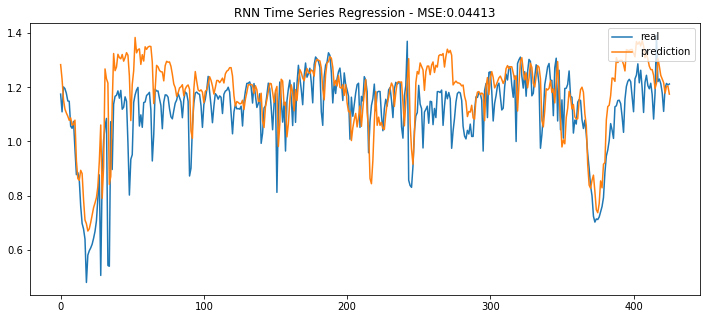

In [73]:
plt.figure(figsize=(12,5))
plt.title('RNN Time Series Regression - MSE:{:.5f}'.format(mean_squar_error))
plt.plot(train_Y ,label = 'real')
plt.plot(train_pred,label = 'prediction')
plt.legend(loc = 'upper right')

##### Test evaluation

In [74]:
test_X.shape

(183, 30, 1, 70)

In [75]:
test_X = test_X.reshape(-1,30,1,70)

In [76]:
test_Y= test_Y.reshape(-1,1,1)

In [77]:
test_pred =[]
for test_data in test_X:
     test_pred.append(sess.run(out,feed_dict={input_ph:test_data})[0][0])

In [78]:
test_Y = test_Y.flatten()

In [79]:
mean_squar_error = np.mean((test_Y-np.array(test_pred))**2)

Text(0.5,1,'RNN Time Series Regression - Testing MSE:0.00815')

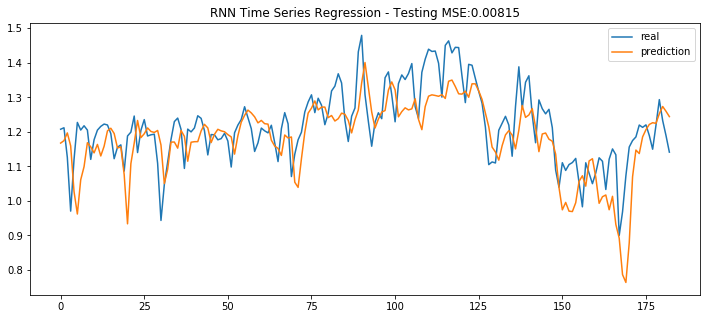

In [81]:
plt.figure(figsize=(12,5))
plt.title('RNN Time Series Regression - Testing MSE:{:.5f}'.format(mean_squar_error))
plt.plot(test_Y ,label = 'real')
plt.plot(test_pred,label = 'prediction')
plt.legend(loc = 'upper right')